In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data.shape

(5572, 5)

In [ ]:
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])
data = data[['v1','v2']]

In [ ]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

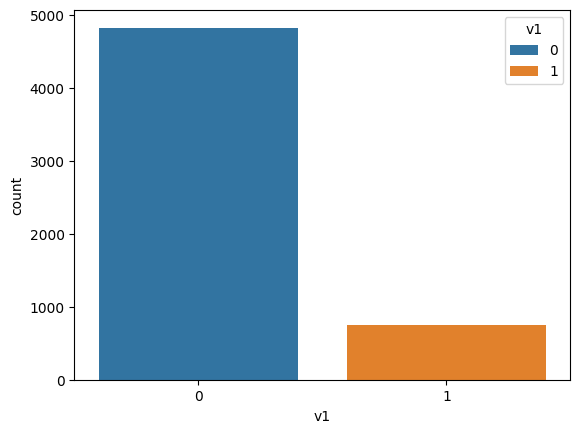

In [ ]:
sns.countplot(data ,x='v1' ,hue='v1')
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

In [ ]:
corpus =[]
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['v2'][i])
    review =review.lower()
    review = review.split()

    review = [stemmer.stem(words) for words in review if not words in stopwords]
    review = ' '.join(review)
    corpus.append(review)

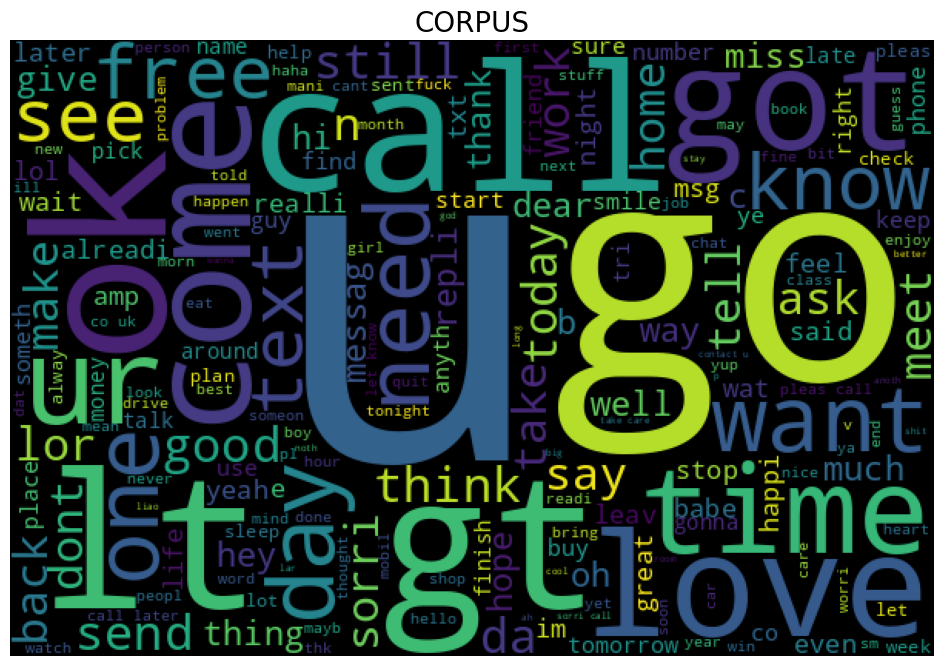

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud=WordCloud(width=600,height=400, contour_color='black').generate(' '.join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('CORPUS',fontsize=20)
plt.show()

In [ ]:
vocabulary_size = 5000

In [ ]:
one_hot_rep = [one_hot(words,vocabulary_size)for words in corpus]
one_hot_rep[1]

[841, 1941, 2357, 1379, 4092, 2712]

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_rep,padding='post',maxlen=sent_length)
embedded_docs[10]

array([ 533, 2546, 2961, 3333,  937, 3337, 1399, 4892, 4683, 4927, 3451,
       2392,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
embedded_vector_length = 40
model = Sequential()
model.add(Embedding(vocabulary_size,embedded_vector_length,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y = data['v1']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_final, y_final)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [ ]:
Model= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
242/242 [==============================] - 14s 57ms/step - loss: 0.1396 - accuracy: 0.9602 - val_loss: 0.0671 - val_accuracy: 0.9772
Epoch 2/10
242/242 [==============================] - 10s 43ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.0834 - val_accuracy: 0.9694
Epoch 3/10
242/242 [==============================] - 8s 34ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0954 - val_accuracy: 0.9793
Epoch 4/10
242/242 [==============================] - 10s 42ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.1063 - val_accuracy: 0.9793
Epoch 5/10
242/242 [==============================] - 10s 43ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1156 - val_accuracy: 0.9777
Epoch 6/10
242/242 [==============================] - 8s 35ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.1139 - val_accuracy: 0.9756
Epoch 7/10
242/242 [==============================] - 12s 51ms/step - loss: 3.6666e-04 - accuracy: 1.0000 - val_loss: 0.1184 - val_accurac

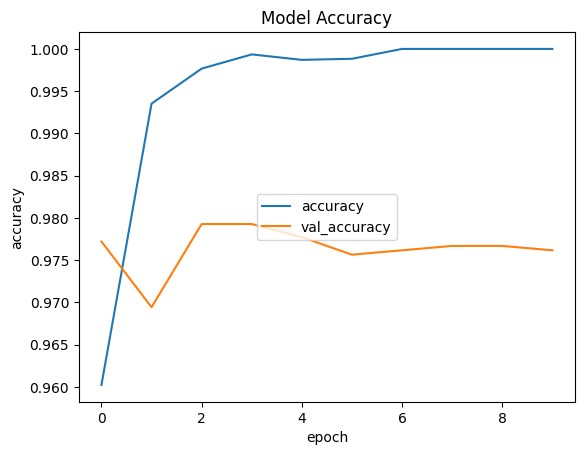

In [ ]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='center')
plt.show()

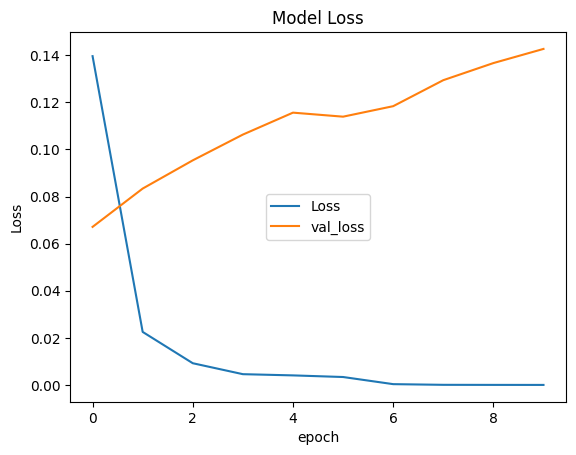

In [ ]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Loss','val_loss'],loc='center')
plt.show()

In [ ]:
prediction = model.predict(X_test)

61/61 [==============================] - 1s 18ms/step


In [ ]:
predictions = np.where(prediction > 0.5 ,1,0)
predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
conf =confusion_matrix(y_test,predictions)
conf

array([[966,  19],
       [ 27, 918]])

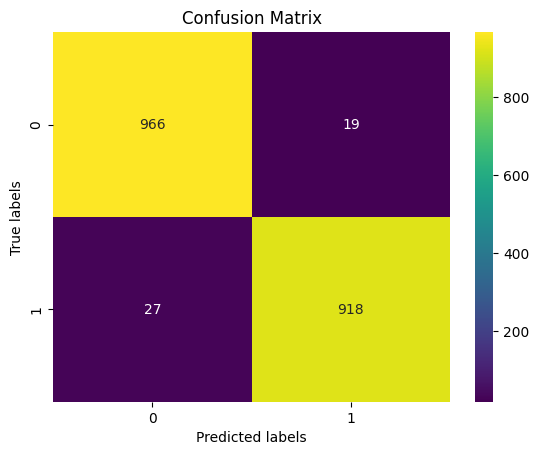

In [ ]:
sns.heatmap(conf,annot = True, fmt='d',cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test,predictions)

0.9761658031088083

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       985
           1       0.98      0.97      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



In [ ]:
model.save('spam_detection.h5')